# (a)

In [92]:
import scipy.io

file = scipy.io.loadmat('CYLINDER_ALL.MAT')
print(file.keys())
#print(file)

dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])


In [93]:
X = file['UALL']

In [94]:
print(X.shape)

(89351, 151)


In [324]:
import numpy as np
[U,S,VT] = np.linalg.svd(X, full_matrices=False) 

(89351, 151)
(151,)


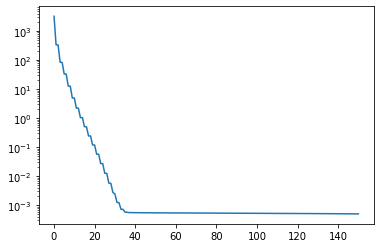

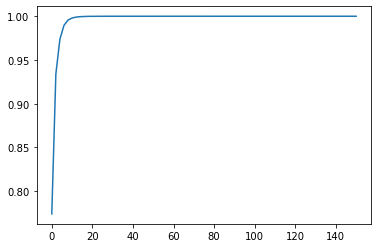

In [335]:
print(U.shape)
S = np.diag(S)
print(S.shape)
plt.semilogy(S)
plt.show()
plt.plot(np.cumsum(S)/np.sum(S))
plt.show()

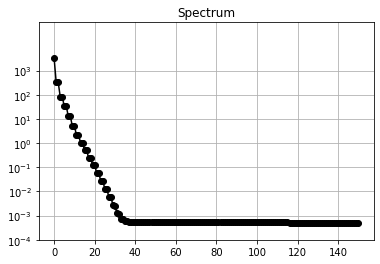

In [110]:
import matplotlib.pyplot as plt

plt.semilogy(S,'-o',color='k')
plt.ylim((10**(-4),10**(5)+1))
plt.yticks(np.power(10,np.arange(-4,4,1, dtype=float)))
#plt.xticks(np.arange(0,160,20))
plt.grid()
plt.title('Spectrum')
plt.show()

(89351, 151)


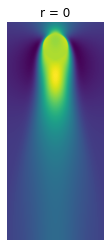

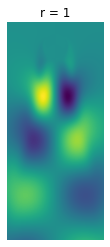

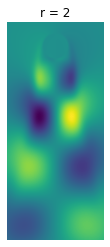

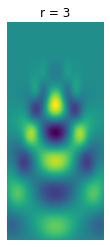

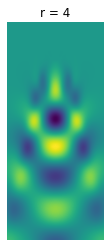

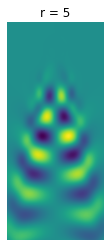

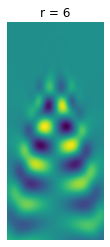

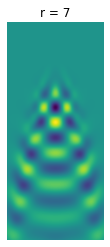

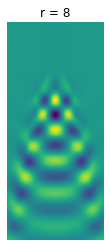

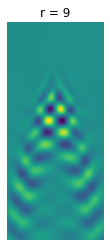

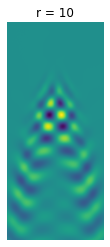

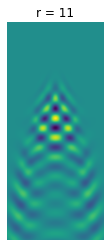

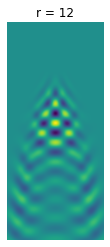

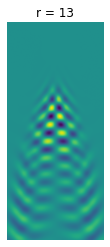

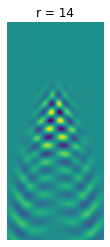

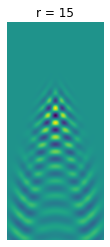

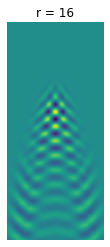

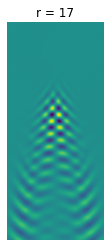

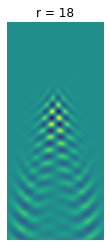

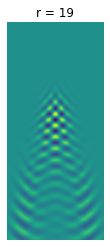

In [353]:
print(U.shape)
#plt.figure(figsize=(15, 12))
#plt.subplots_adjust(hspace=0.5)
#plt.suptitle("singular vectors", fontsize=18, y=0.95)

#for index, i in enumerate(30):
n = 449
m = 199
for i in range(20):
    M = np.reshape(U[:,i], (n,m))
    #ax = plt.subplot(6, 5, index+1 )
    plt.figure()
    plt.title('r = ' + str(i))
    plt.imshow(M)
    plt.axis('off')

# (b)

In [275]:
[U,S,VT] = np.linalg.svd(X, full_matrices=False) 
S = np.diag(S)
r=5
X_trunc = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
print(X_trunc.shape)

(89351, 151)


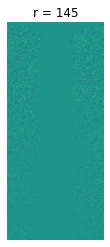

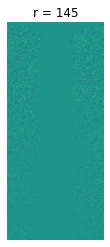

In [278]:
#U matrix contains eigen flow fields

%matplotlib inline
import time
import pylab as pl
from IPython import display
for r in range(5, 150, 5):
    #X_trunc = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    #X_reshaped = np.reshape(X_trunc[:,i], (449,199))

    M = np.reshape(U[:,r], (n,m))
    plt.title('r = ' + str(r))
    plt.imshow(M)
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

[0.77403799 0.85456079 0.93389393 0.95394033 0.97375687 0.98169175
 0.98956607 0.99259946 0.99561573 0.9967964  0.99797419 0.99850132
 0.99902718 0.99927501 0.99952217 0.99964239 0.99976218 0.99982008
 0.99987782 0.99990615 0.9999344  0.99994807 0.99996169 0.99996816
 0.9999746  0.99997759 0.99998056 0.99998194 0.99998328 0.99998394
 0.99998452 0.99998481 0.9999851  0.99998528 0.99998545 0.99998558
 0.99998572 0.99998585 0.99998598 0.99998611 0.99998624 0.99998638
 0.99998651 0.99998664 0.99998677 0.9999869  0.99998703 0.99998716
 0.99998729 0.99998742 0.99998755 0.99998768 0.99998781 0.99998793
 0.99998806 0.99998819 0.99998832 0.99998845 0.99998858 0.99998871
 0.99998884 0.99998896 0.99998909 0.99998922 0.99998935 0.99998948
 0.9999896  0.99998973 0.99998986 0.99998999 0.99999011 0.99999024
 0.99999037 0.99999049 0.99999062 0.99999075 0.99999087 0.999991
 0.99999113 0.99999125 0.99999138 0.99999151 0.99999163 0.99999176
 0.99999188 0.99999201 0.99999214 0.99999226 0.99999239 0.999992

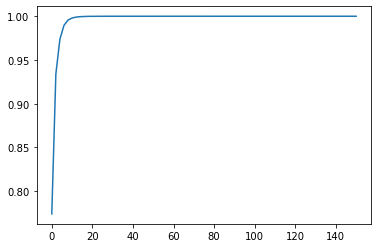

In [139]:

S= np.diag(S)
cumSum = np.cumsum(S)/np.sum(S)
plt.plot(cumSum)
print(cumSum)

[0.7740379885853923, 0.9816917510599668, 0.9979741865245931, 0.9996423907509563, 0.9999343952521421, 0.9999775912842416, 0.9999845158737105, 0.9999855826461711, 0.9999862447494351, 0.9999868975331057, 0.9999875464050046, 0.9999881923711218, 0.9999888353021256, 0.9999894758794491, 0.9999901133584078, 0.9999907479137191, 0.999991380180644, 0.9999920109356802, 0.9999926396891605, 0.9999932663694316, 0.9999938904434589, 0.9999945125220143, 0.9999951324266749, 0.9999957497909151, 0.9999963647708517, 0.999996977440702, 0.9999975880564936, 0.9999981955858688, 0.9999988005637924, 0.9999994022590093]


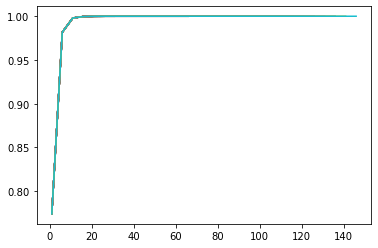

In [140]:
r_val =[]
cumSum = []
for i in range(1, 150, 5):
    cumSum.append(np.cumsum(S)[i-1]/np.sum(S))
    r_val.append(i)
    
    plt.plot(r_val, cumSum)
print(cumSum)

In [155]:
for p in [0.9, 0.99, 0.999]:
    r_needed = next(k for k, value in enumerate(cumSum) if value > p)
    print(f" rank need to capture {p} is: ", r_val[r_needed])

 rank need to capture 0.9 is:  2
 rank need to capture 0.99 is:  3
 rank need to capture 0.999 is:  4


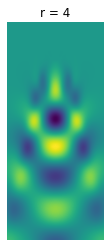

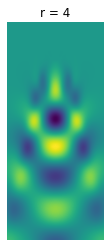

In [279]:
for i in [2,3,4]:
    M = np.reshape(U[:,i], (n,m))
    plt.title('r = ' + str(i))
    plt.imshow(M)
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [281]:
S = np.diag(S)
r_val =[]
rel_Err = []
for r in [2,3,4]:
    
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]

    rel_err = (np.linalg.norm(Xapprox - X, 'fro')/np.linalg.norm(X, 'fro'))**2
    rel_Err.append(1-rel_err)
    r_val.append(r)

print(rel_Err)

[0.9881944728228845, 0.9984640451119325, 0.9991197614893366]


# (c)

(10, 151)


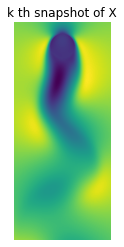

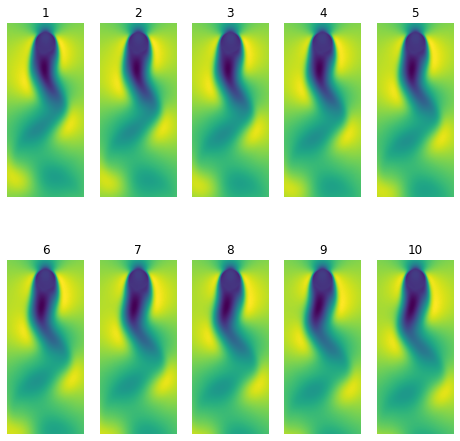

In [327]:
r = 10
#S = np.diag(S)

X_truncated = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
Xk = np.reshape(X[:,r], (n,m))
plt.figure()
plt.title('k th snapshot of X')
plt.imshow(Xk)
plt.axis('off')

W = S[0:r,:r] @ VT[:r,:]
print(W.shape)
#for i in range(11):
 #   U_tildaWk = U[:,:r] @W[:,i]
  #  plt.figure()
    
   # plt.imshow(np.reshape(U_tildaWk, (n,m)))

    

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    U_tildaWk = U[:,:r] @W[:,i]
    img = np.reshape(U_tildaWk, (n,m))
    fig.add_subplot(rows, columns, i)
    plt.title(i)
    plt.imshow(img)
    plt.axis('off')

plt.show()


# (d)

(151,)
(151, 151)
(89351, 151)
(10, 151)
(10, 10)
(10, 10)
(151, 10)
(151, 10)
<class 'numpy.ndarray'>


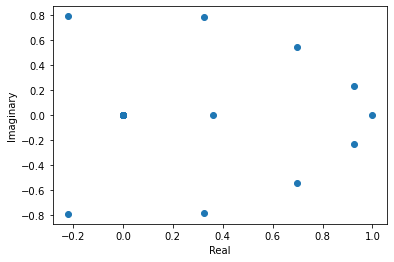

In [340]:
[U,S,VT] = np.linalg.svd(X, full_matrices=False) 
print(S.shape)
print(VT.shape)
k= 10
S= np.diag(S)
WW = S @ VT
#print(WW.shape)
W = WW[:,0:k]
Wprime = WW[:, 1:k+1]

[UW,SW,VWT] = np.linalg.svd(W, full_matrices=False) 
print(U.shape)
SW= np.diag(SW)

invSW = np.linalg.inv(SW)
#invS= np.diag(S)
W_pseudoinv = VWT.T @ invSW @ UW.T
print(UW.T.shape)
print(VWT.shape)
print(invSW.shape)
print(Wprime.shape)
print(W.shape)
A_approx = Wprime@VWT.T @ invSW @ UW.T
print(type(A_approx))
eig, vec = np.linalg.eig(A_approx)
#print(eig.shape)
# extract real part
x = [ele.real for ele in eig]
# extract imaginary part
y = [ele.imag for ele in eig]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

# (e)

In [341]:
print(W.shape)

(151, 10)


(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
(151,)
[0.03536700392797682, 0.03547362866856614, 0.03544088517052063, 0.03528661178570435, 0.035105087194200205, 0.034992514906403795, 0.03493208905980286, 0.034838714483291976, 0.034678888649093964, 0.03450302946382172]


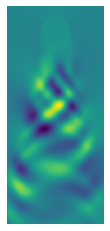

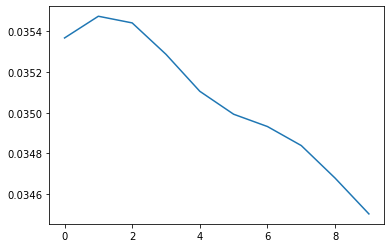

In [357]:
w1 = W[:,0]
print(w1.shape)
w = w1
err =[]
reconstructed_W = np.zeros([10, 151])


plt.show()

for k in range(10):
    w = A_approx @ w
    #w= Wprime @ VT.T @ invS @ U.T @ w
    print(w.shape)
    #arr = np.concatenate([ini_array, w], axis=1)
    reconstructed_W[k,:] = w
    
    error = np.linalg.norm(w - W[:,k])/np.linalg.norm(W[:,k])
    err.append(error)
U_tildaWk = U[:,:r] @ reconstructed_W[:,k]

plt.figure()
plt.imshow(np.reshape(U_tildaWk, (n, m)))
plt.axis('off')

plt.figure()
print(err)
plt.plot(err)
plt.show()


In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    #w = Wprime @ VWT.T @ invSW @ UW.T @ w
    w = A_approx@w
    print(U[:,:r].shape)
    print(1, w.shape)
    U_tildaWk = U[:,:r] @ w
    img = np.reshape(U_tildaWk, (n,m))
    fig.add_subplot(rows, columns, i)
    plt.title(i)
    plt.imshow(img)
    plt.axis('off')




